In [1]:
# Display plots in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [43]:
# Common imports
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.ticker as mtick

In [3]:
# Make plots prettyful
pl.style.use('fivethirtyeight')

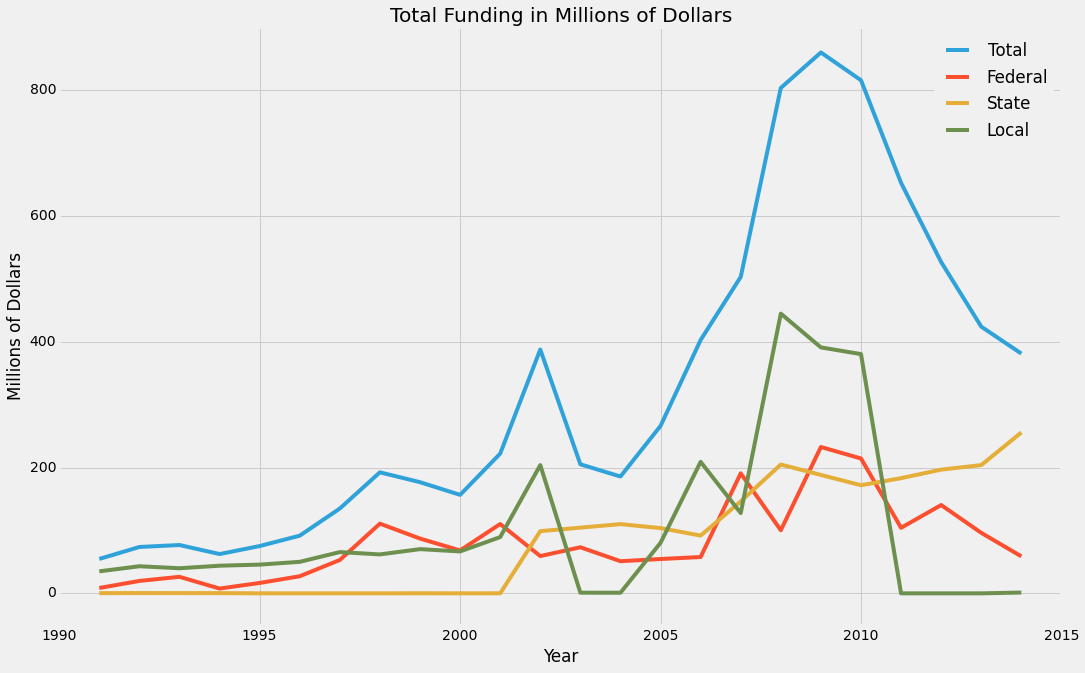

In [66]:
data = pd.read_excel('../data/TS1.1TimeSeriesOpCapFundingSummary.xls', sheetname=range(4))
figure, ax = pl.subplots(figsize=(16,10))
labels = ['Total', 'Federal', 'State', 'Local']
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%2.0f million'))
ax.set_ylim([-50,900])
ax.set_title('Total Funding in Millions of Dollars')
for l,df in enumerate(data.values()):
    ax.plot(
        range(1991,2015),
        df[df['5 Digit NTDID'] == 80001][[str(i) for i in range(1991,2015)]].values.reshape(24)/1000000,
        label=labels[l]
    )
ax.legend()
ax.set_ylabel('Millions of Dollars')
ax.set_xlabel('Year')

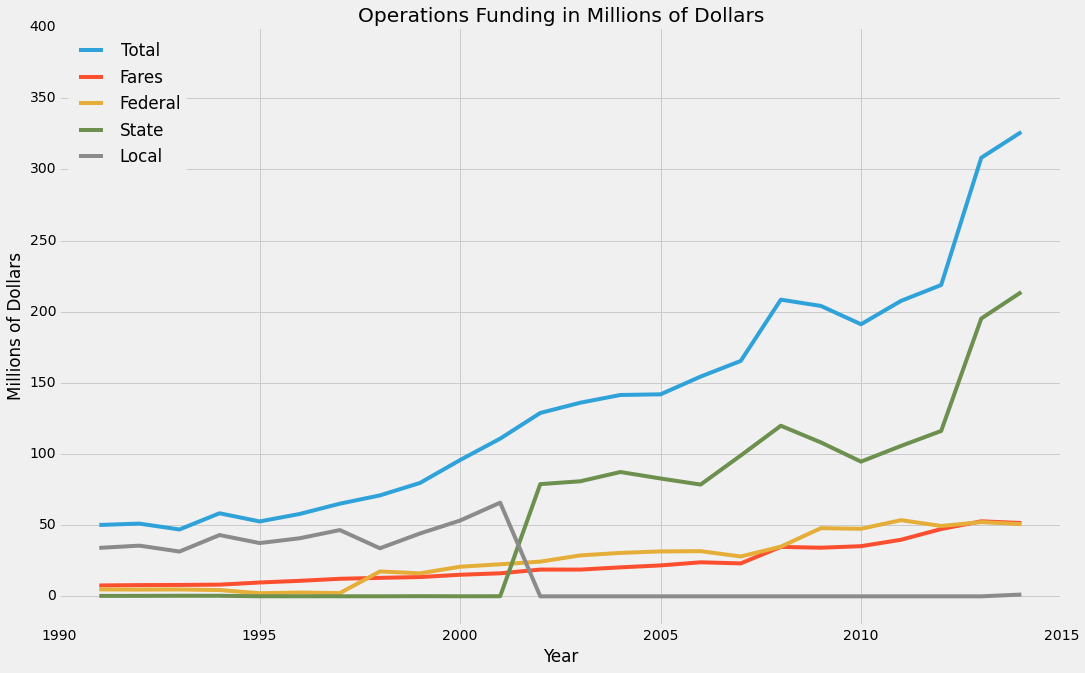

In [73]:
data = pd.read_excel('../data/TS1.2TimeSeriesOpFunding.xls', sheetname=range(5))
figure, ax = pl.subplots(figsize=(16,10))
labels = ['Total', 'Fares', 'Federal', 'State', 'Local']
ax.set_ylim([-20,400])
ax.set_title('Operations Funding in Millions of Dollars')
for l,df in enumerate(data.values()):
    ax.plot(
        range(1991,2015),
        df[df['5 Digit NTDID'] == 80001][[str(i) for i in range(1991,2015)]].values.reshape(24)/1000000,
        label=labels[l]
    )
ax.legend(loc='upper left')
ax.set_ylabel('Millions of Dollars')
ax.set_xlabel('Year')

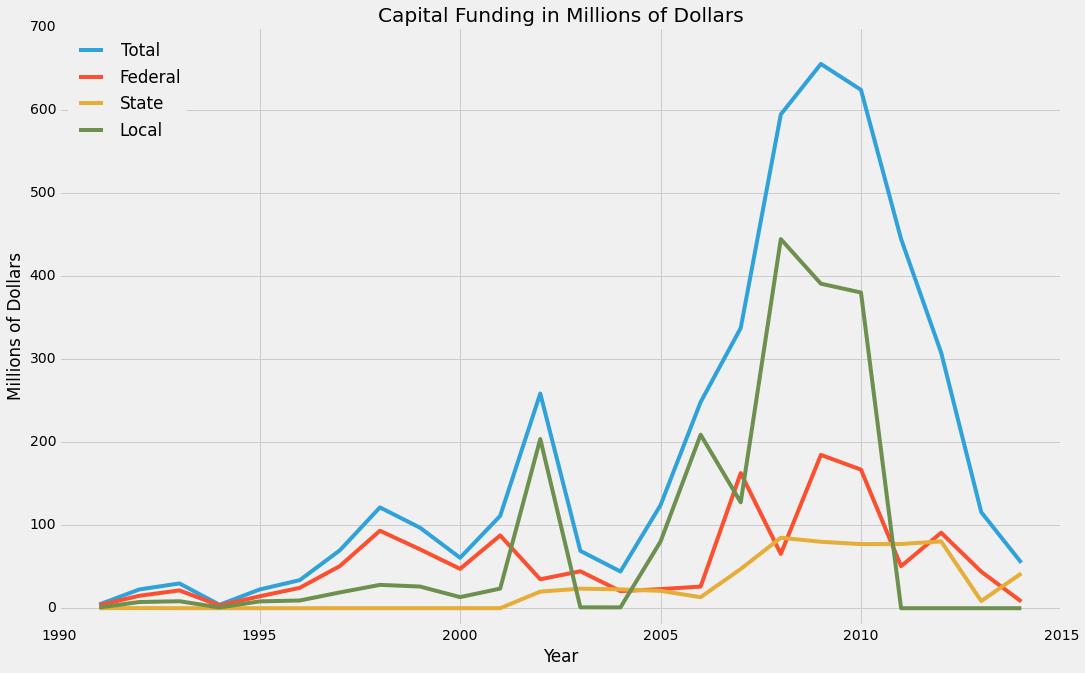

In [78]:
data = pd.read_excel('../data/TS1.3TimeSeriesCapFunding.xls', sheetname=range(4))
figure, ax = pl.subplots(figsize=(16,10))
labels = ['Total', 'Federal', 'State', 'Local']
ax.set_ylim([-20,700])
ax.set_title('Capital Funding in Millions of Dollars')
for l,df in enumerate(data.values()):
    ax.plot(
        range(1991,2015),
        df[df['5 Digit NTDID'] == 80001][[str(i) for i in range(1991,2015)]].values.reshape(24)/1000000,
        label=labels[l]
    )
ax.legend(loc='upper left')
ax.set_ylabel('Millions of Dollars')
ax.set_xlabel('Year')

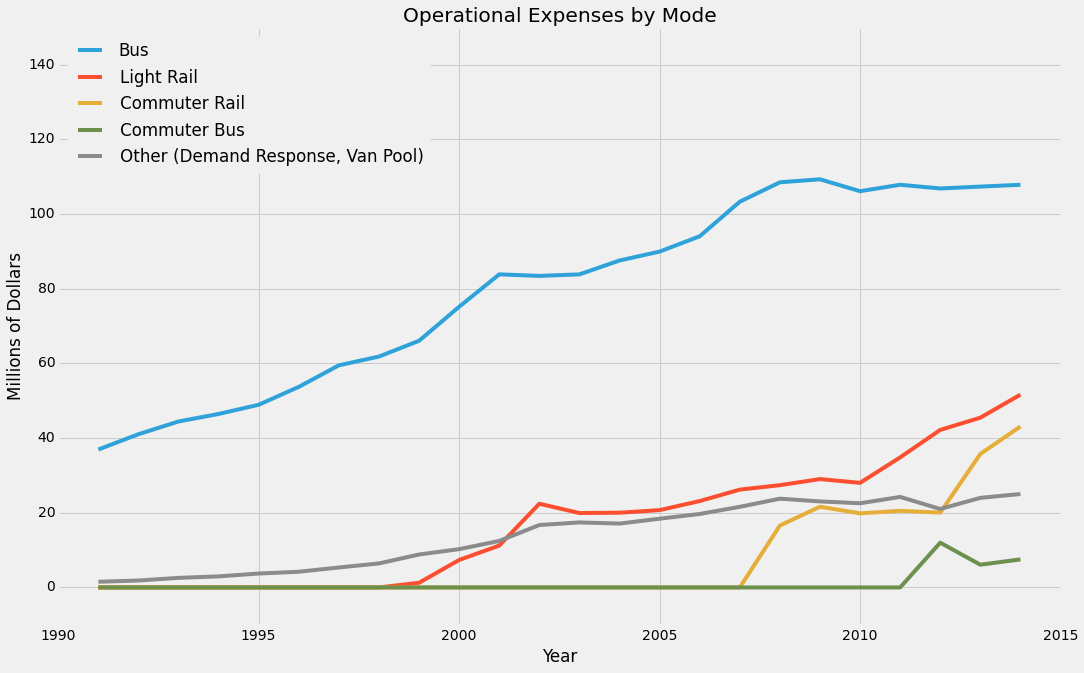

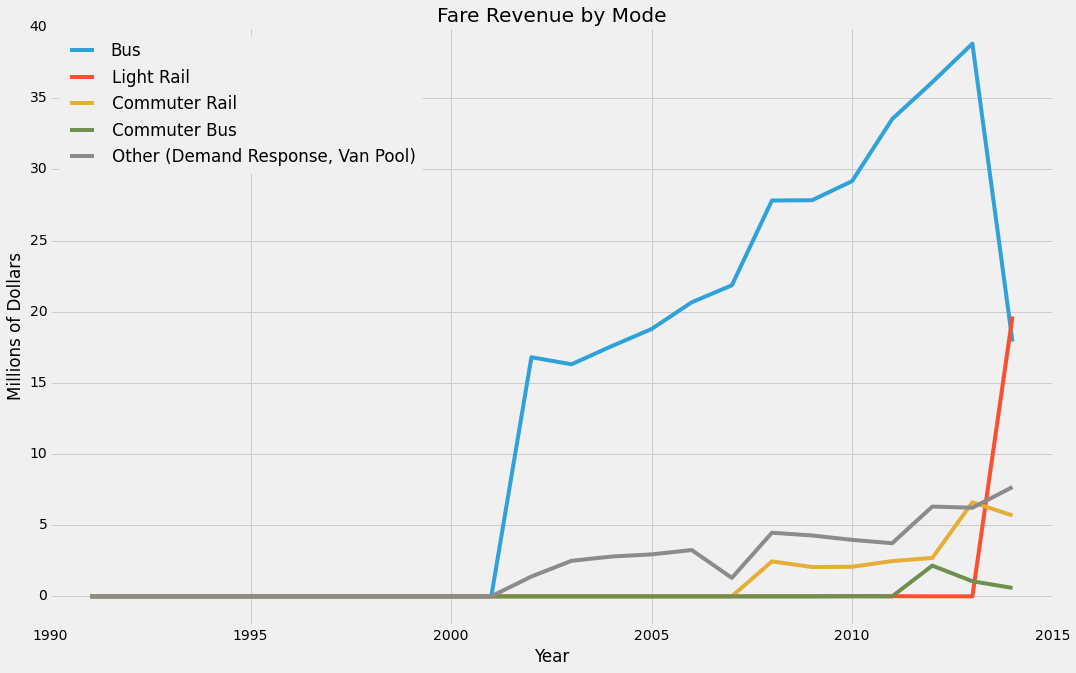

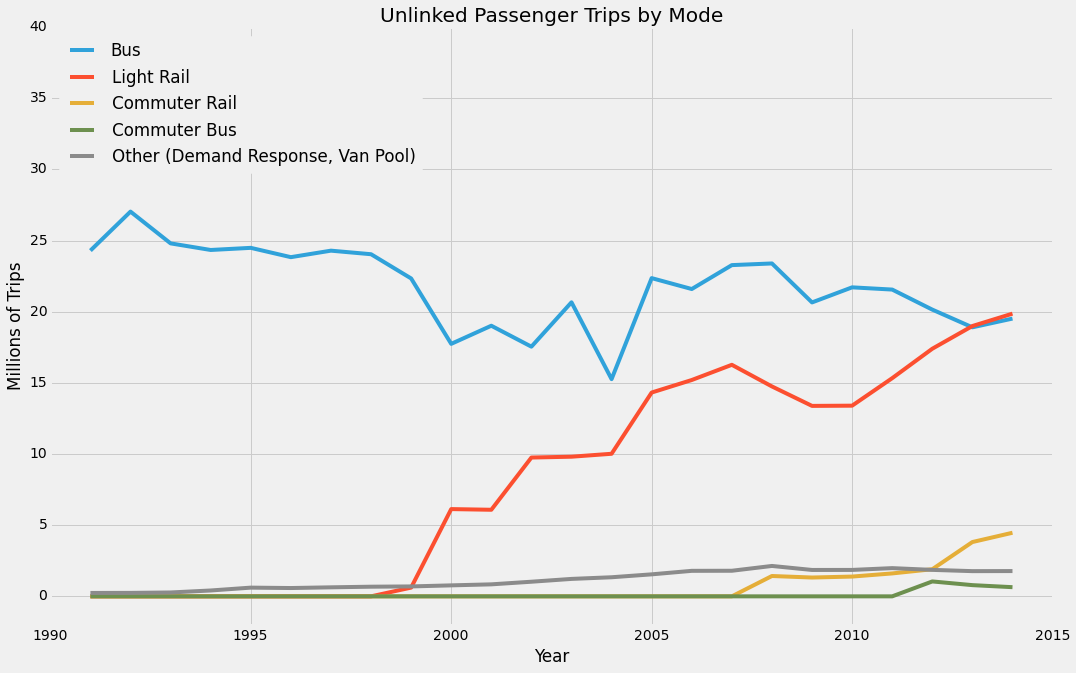

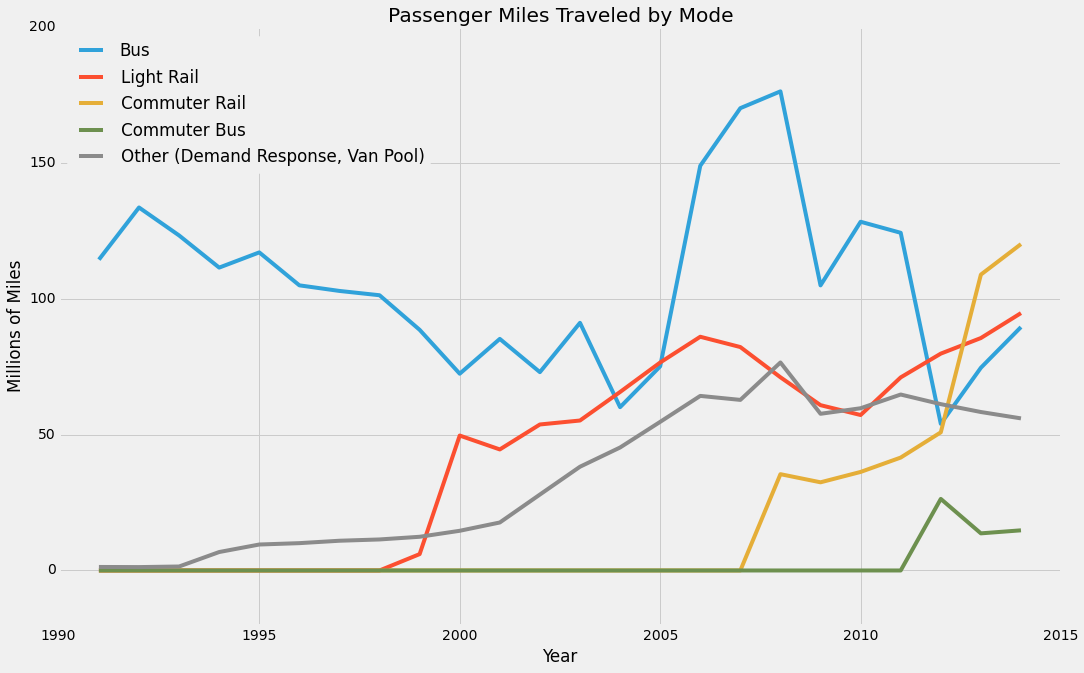

In [117]:
data = pd.read_excel('../data/TS2.1TimeSeriesOpExpSvcModeTOS.xls', sheetname=range(4))

#labels = ['Total', 'Federal', 'State', 'Local']
titles = [
    'Operational Expenses by Mode',
    'Fare Revenue by Mode',
    'Unlinked Passenger Trips by Mode',
    'Passenger Miles Traveled by Mode'
]
ylims = [
    [-10,150],
    [-2,40],
    [-2,40],
    [-20,200]
]
ylabels = ['Millions of Dollars', 'Millions of Dollars', 'Millions of Trips', 'Millions of Miles']
divisors = [1000000,1000000,1000000,1000000]
labels = {
    'MB': 'Bus',
    'CB': 'Commuter Bus',
    #'VP': 'Van Pool',
    'LR': 'Light Rail',
    #'RB': 'Bus Rapid Transit',
    'CR': 'Commuter Rail',
    #'DT': 'Demand Response-Taxi',
    #'DR': 'Demand Response',
    'O': 'Other (Demand Response, Van Pool)'
}

for i,df in enumerate(data.values()):
    figure, ax = pl.subplots(figsize=(16,10))
    ax.set_ylim(ylims[i])
    ax.set_title(titles[i])
    ax.set_xlabel('Year')
    ax.set_ylabel(ylabels[i])
    
    modes = df[df['5 Digit NTDID'] == 80001].groupby('Mode')
    for mode in ['MB', 'LR', 'CR', 'CB', 'O']:
        if mode is 'O':
            total = modes.get_group('VP').sum() + modes.get_group('DR').sum() + modes.get_group('DT').sum()
        else:
            total = modes.get_group(mode).sum()
            
        ax.plot(
            range(1991,2015),
            total[[str(j) for j in range(1991,2015)]].values.reshape(24)/divisors[i],
            label=labels[mode]
        )
        
    ax.legend(loc='upper left')

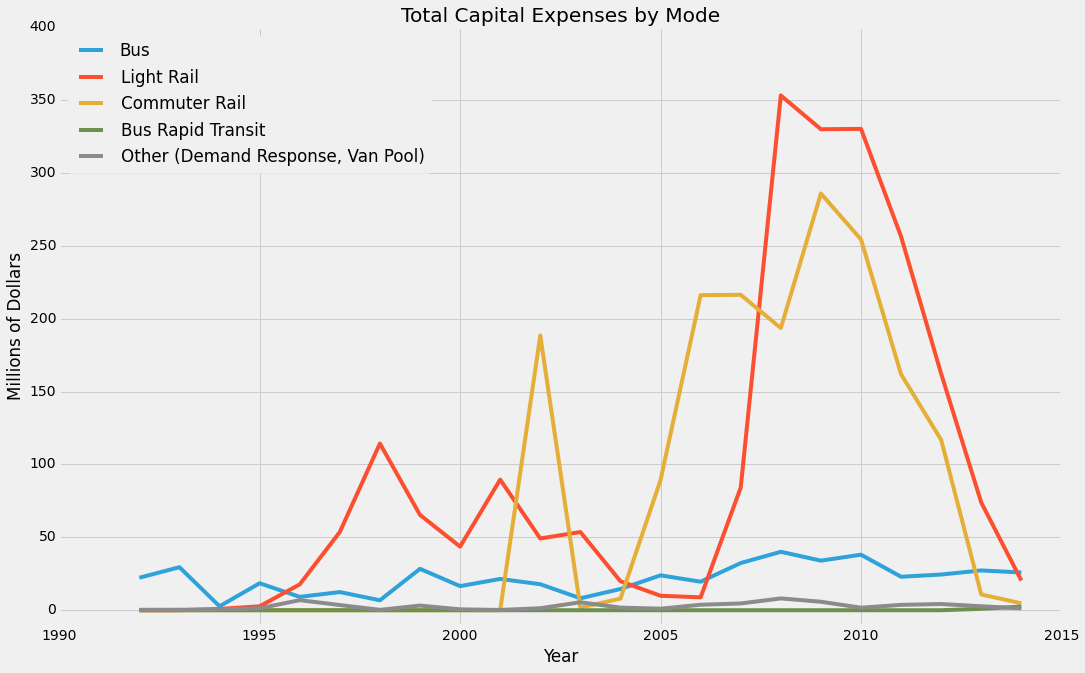

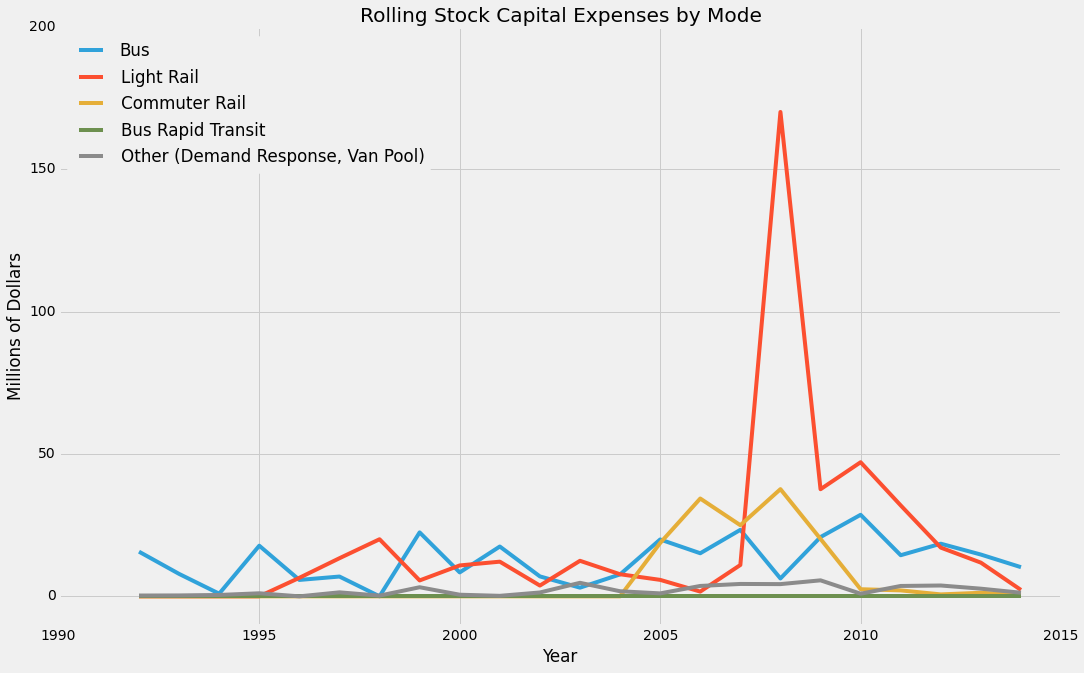

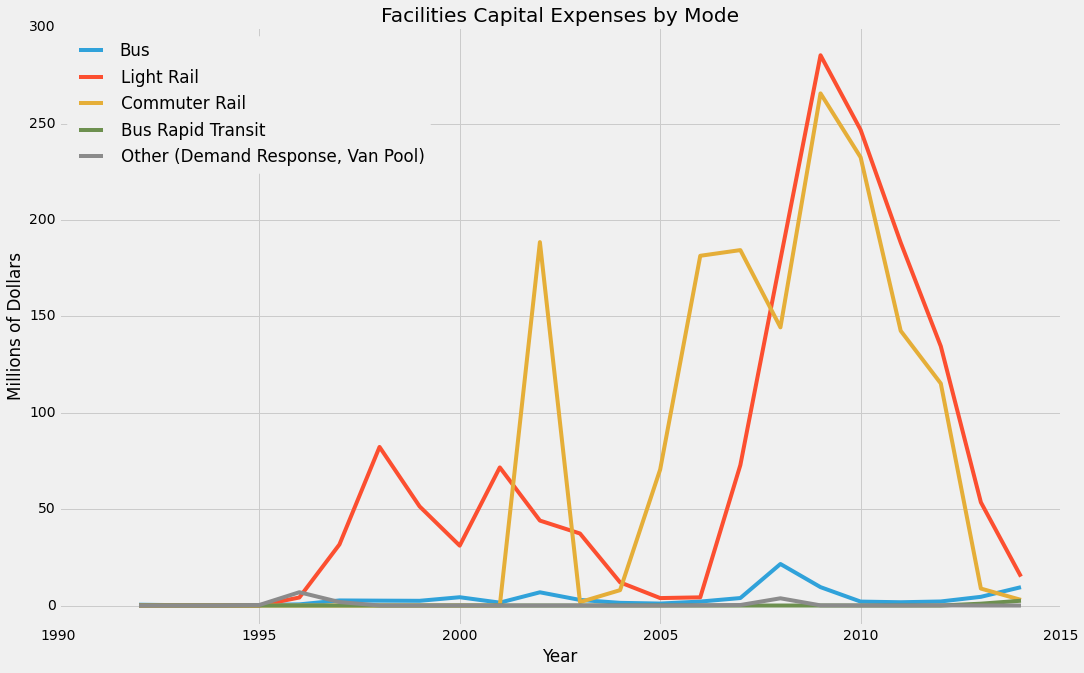

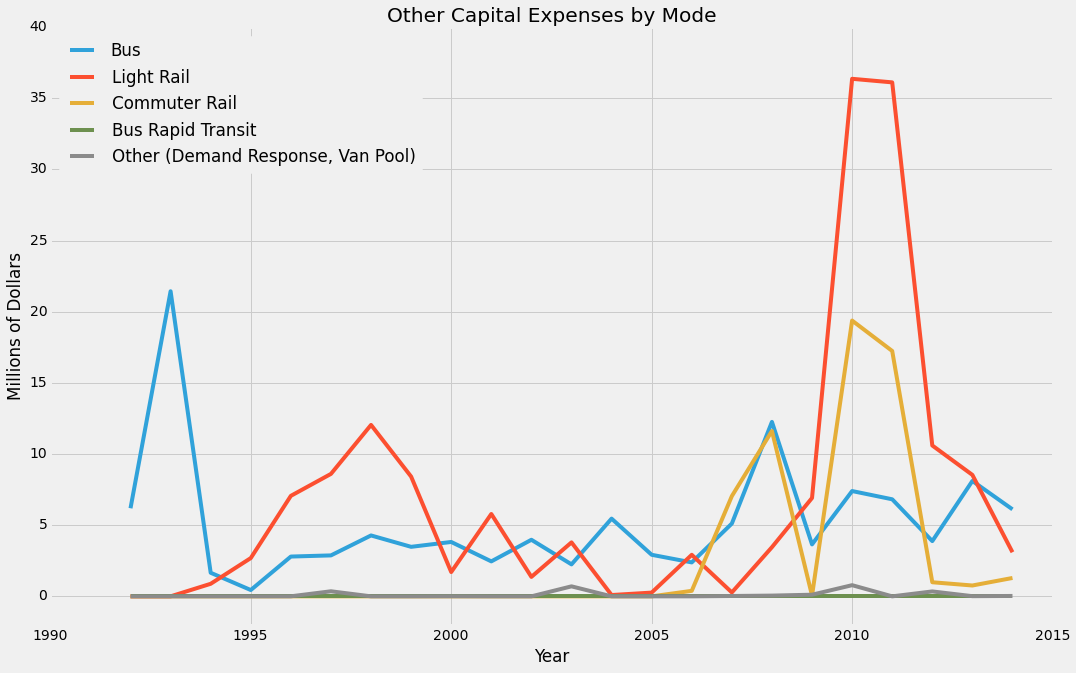

In [124]:
data = pd.read_excel('../data/TS3.1TimeSeriesUsesofCap.xls', sheetname=range(4))

#labels = ['Total', 'Federal', 'State', 'Local']
titles = [
    'Total Capital Expenses by Mode',
    'Rolling Stock Capital Expenses by Mode',
    'Facilities Capital Expenses by Mode',
    'Other Capital Expenses by Mode'
]
ylims = [
    [-10,400],
    [-10,200],
    [-10,300],
    [-2,40]
]
ylabels = ['Millions of Dollars', 'Millions of Dollars', 'Millions of Dollars', 'Millions of Dollars']
divisors = [1000000,1000000,1000000,1000000]
labels = {
    'MB': 'Bus',
    'CB': 'Commuter Bus',
    'VP': 'Van Pool',
    'LR': 'Light Rail',
    'RB': 'Bus Rapid Transit',
    'CR': 'Commuter Rail',
    'DT': 'Demand Response-Taxi',
    'DR': 'Demand Response',
    'O': 'Other (Demand Response, Van Pool)'
}

for i,df in enumerate(data.values()):
    figure, ax = pl.subplots(figsize=(16,10))
    ax.set_ylim(ylims[i])
    ax.set_title(titles[i])
    ax.set_xlabel('Year')
    ax.set_ylabel(ylabels[i])
    
    modes = df[df['5 Digit NTDID'] == 80001].groupby('Mode')
    for mode in ['MB', 'LR', 'CR', 'RB', 'O']:
        if mode is 'O':
            total = modes.get_group('VP').sum() + modes.get_group('DR').sum() + modes.get_group('DT').sum()
        else:
            total = modes.get_group(mode).sum()
            
        ax.plot(
            range(1991,2015),
            total[[str(j) for j in range(1991,2015)]].values.reshape(24)/divisors[i],
            label=labels[mode]
        )
        
    ax.legend(loc='upper left')

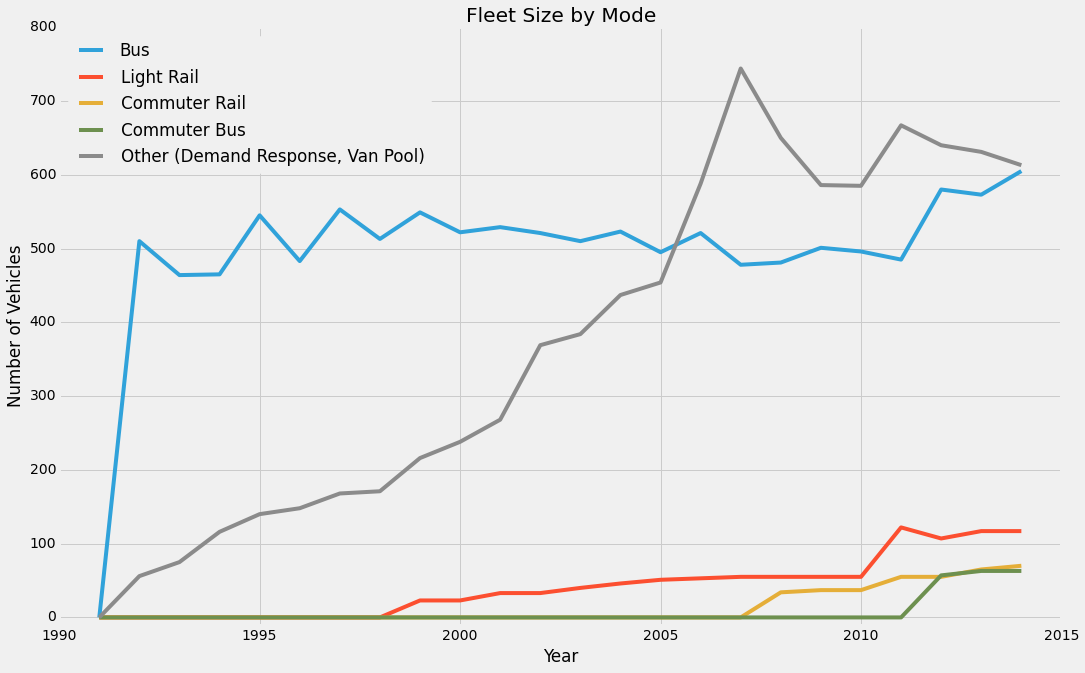

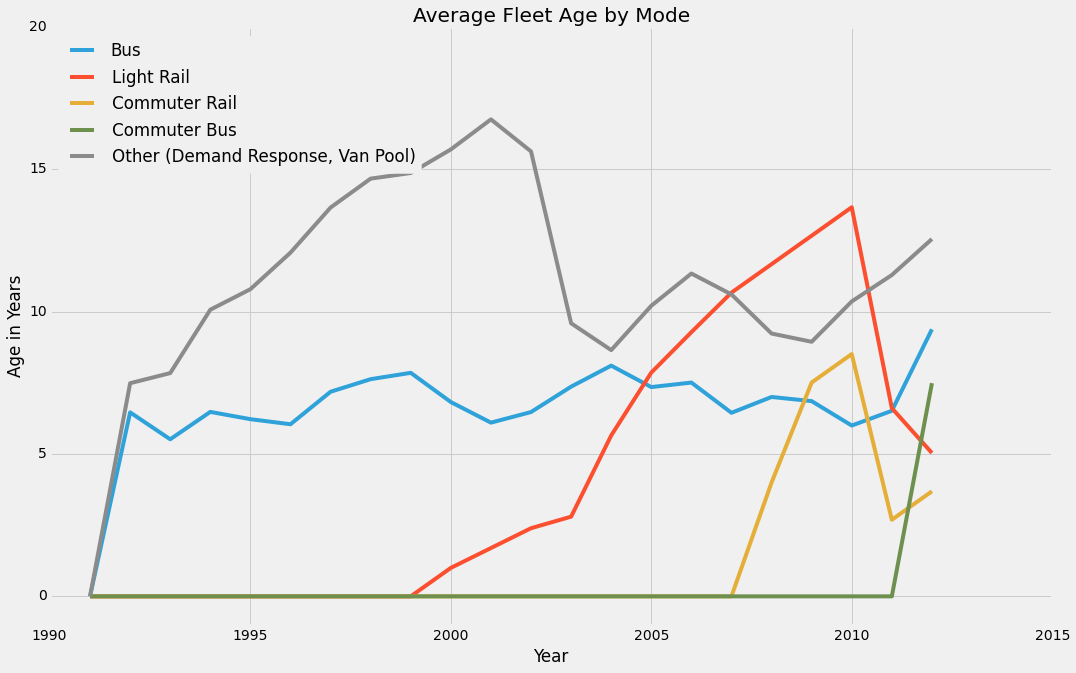

In [132]:
data = pd.read_excel('../data/TS4.1TimeSeriesAssetModeTOS.xls', sheetname=range(2))

#labels = ['Total', 'Federal', 'State', 'Local']
titles = [
    'Fleet Size by Mode',
    'Average Fleet Age by Mode',
]
ylims = [
    [-10,800],
    [-1,20],
    [-10,300],
    [-2,40]
]
ylabels = ['Number of Vehicles', 'Age in Years']
divisors = [1,1]
labels = {
    'MB': 'Bus',
    'CB': 'Commuter Bus',
    'VP': 'Van Pool',
    'LR': 'Light Rail',
    'RB': 'Bus Rapid Transit',
    'CR': 'Commuter Rail',
    'DT': 'Demand Response-Taxi',
    'DR': 'Demand Response',
    'O': 'Other (Demand Response, Van Pool)'
}

for i,df in enumerate(data.values()):
    figure, ax = pl.subplots(figsize=(16,10))
    ax.set_ylim(ylims[i])
    ax.set_title(titles[i])
    ax.set_xlabel('Year')
    ax.set_ylabel(ylabels[i])
    
    modes = df[df['5 Digit NTDID'] == 80001].groupby('Mode')
    for mode in ['MB', 'LR', 'CR', 'CB', 'O']:
        if mode is 'O':
            total = modes.get_group('VP').sum() + modes.get_group('DR').sum() + modes.get_group('DT').sum()
        else:
            total = modes.get_group(mode).sum()
            
        ax.plot(
            range(1991,2015),
            total[[str(j) for j in range(1991,2015)]].values.reshape(24)/divisors[i],
            label=labels[mode]
        )
        
    ax.legend(loc='upper left')